In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from sklearn.model_selection import cross_val_predict,RandomizedSearchCV
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import LabelEncoder , StandardScaler,OrdinalEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
import lightgbm as lgbm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")

In [37]:
train_sample=pd.read_csv("train.csv")

In [38]:
train_orgin_extra=pd.read_csv("ObesityDataSet.csv")

In [39]:
train = pd.concat([train_sample,train_orgin_extra], ignore_index=True)

In [40]:
test=pd.read_csv("test.csv")

# **Exploratory Data Analysis (EDA)**

***i) Simple Analysis***



In [ ]:
train.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0.0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1.0,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2.0,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3.0,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4.0,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [ ]:
train.shape

(22869, 18)

In [ ]:
train.describe()

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,20758.00000,22869.000000,22869.000000,22869.000000,22869.000000,22869.000000,22869.000000,22869.000000,22869.000000
mean,10378.50000,23.885263,1.700377,87.767610,2.443428,2.754344,2.027442,0.984382,0.620551
std,5992.46278,5.753419,0.087881,26.364243,0.533329,0.712711,0.608901,0.839466,0.602850
min,0.00000,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,5189.25000,20.000000,1.631662,66.000000,2.000000,3.000000,1.755907,0.015860,0.000000
50%,10378.50000,22.815416,1.700000,84.000000,2.392665,3.000000,2.000000,1.000000,0.579541
75%,15567.75000,26.000000,1.763029,111.531208,3.000000,3.000000,2.535127,1.596576,1.000000
max,20757.00000,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


- Note that there are differences in the scale of the data, so we need to perform scaling.

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22869 entries, 0 to 22868
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  float64
 1   Gender                          22869 non-null  object 
 2   Age                             22869 non-null  float64
 3   Height                          22869 non-null  float64
 4   Weight                          22869 non-null  float64
 5   family_history_with_overweight  22869 non-null  object 
 6   FAVC                            22869 non-null  object 
 7   FCVC                            22869 non-null  float64
 8   NCP                             22869 non-null  float64
 9   CAEC                            22869 non-null  object 
 10  SMOKE                           22869 non-null  object 
 11  CH2O                            22869 non-null  float64
 12  SCC                             

- There are some columns with object type, so we need to perform encoding.

In [41]:
train.drop('id', axis=1, inplace=True)

In [ ]:
train.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

- There is no missing data.

In [ ]:
train.duplicated().sum()

24

- There is  duplicated data , we should drop them

In [42]:
train = train.drop_duplicates()

In [43]:
train.duplicated().sum()

0

In [ ]:
train.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

 ***ii) Visual Analysis***

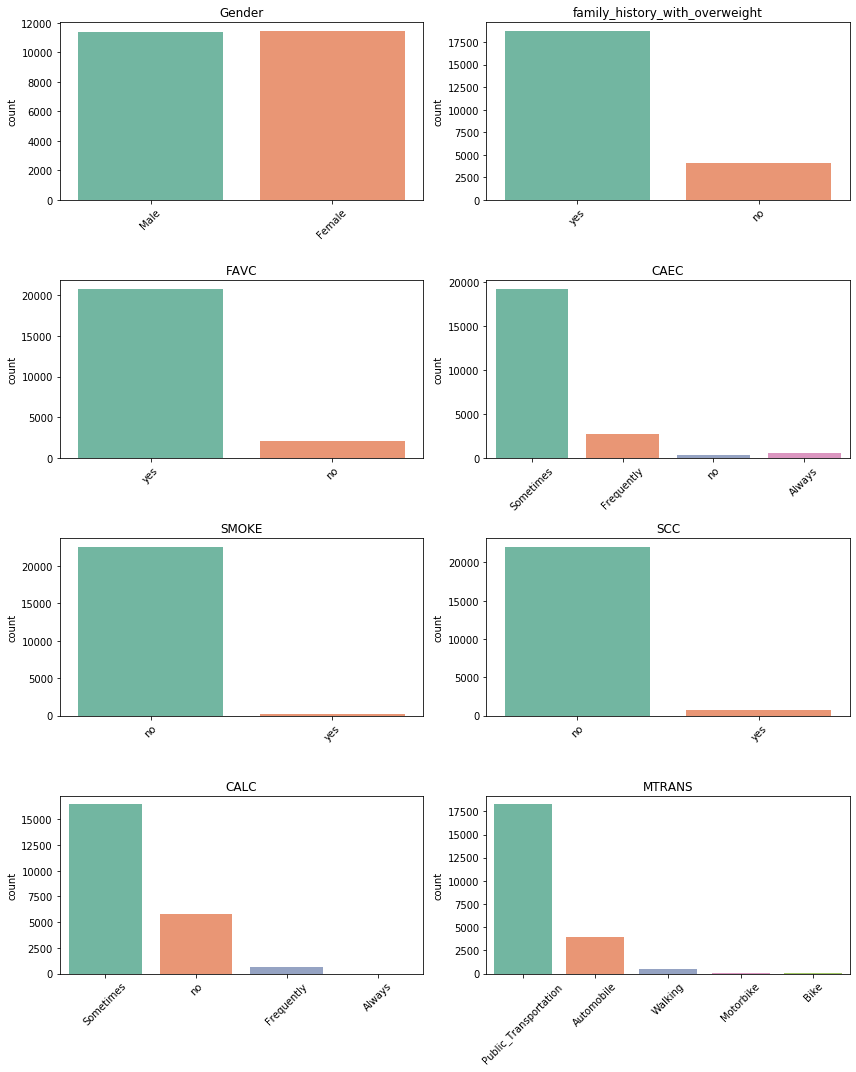

In [ ]:
categorical_features = train.select_dtypes(include=['O']).columns.tolist()
categorical_features.remove('NObeyesdad')

fig, axs = plt.subplots(nrows=4,ncols=2, figsize=(12, 15))

axs = axs.flatten()

for i, feature in enumerate(categorical_features):
    sns.countplot(data=train,x=feature,ax=axs[i],palette='Set2')
    axs[i].set_xticklabels(labels=axs[i].get_xticklabels(), rotation=45)
    axs[i].set_xlabel('')
    axs[i].set_title(feature)

plt.tight_layout()
plt.show()

- There are no balance between categories in the same feature.

- The majority of people consume large quantities of food that are high in calories (FAVC).

- Most individuals consume food between meals (CAEC) sometimes.

- We observe a significant difference in the prevalence of smoking among individuals, with varying proportions of smokers and non-smokers. The same pattern is noted for the SCC (Self-Care Commitment) feature.

- Most individuals consume alcoholic beverages (CALC) sometimes.

- As the vast majority of individuals opt for public transportation as their primary mode of commuting, we will delve deeper into the MTRANS feature by examining the distribution of weight classifications.



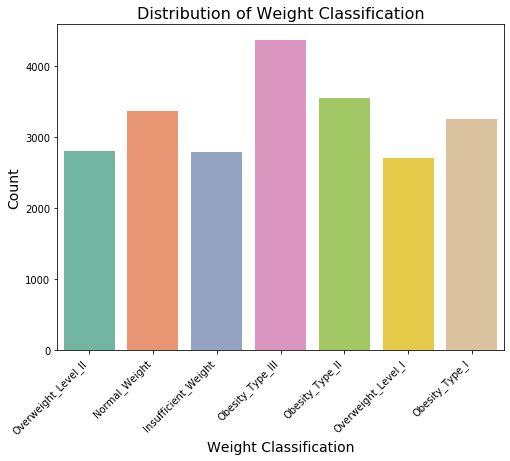

In [ ]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='NObeyesdad', data=train, palette='Set2')

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.title('Distribution of Weight Classification', fontsize=16)
plt.xlabel('Weight Classification', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

- We notice a relatively balanced distribution across all classes, with "Obesity_Type_III" being the highest . This is good as there will not likely be a bias towards any class during model training for prediction.

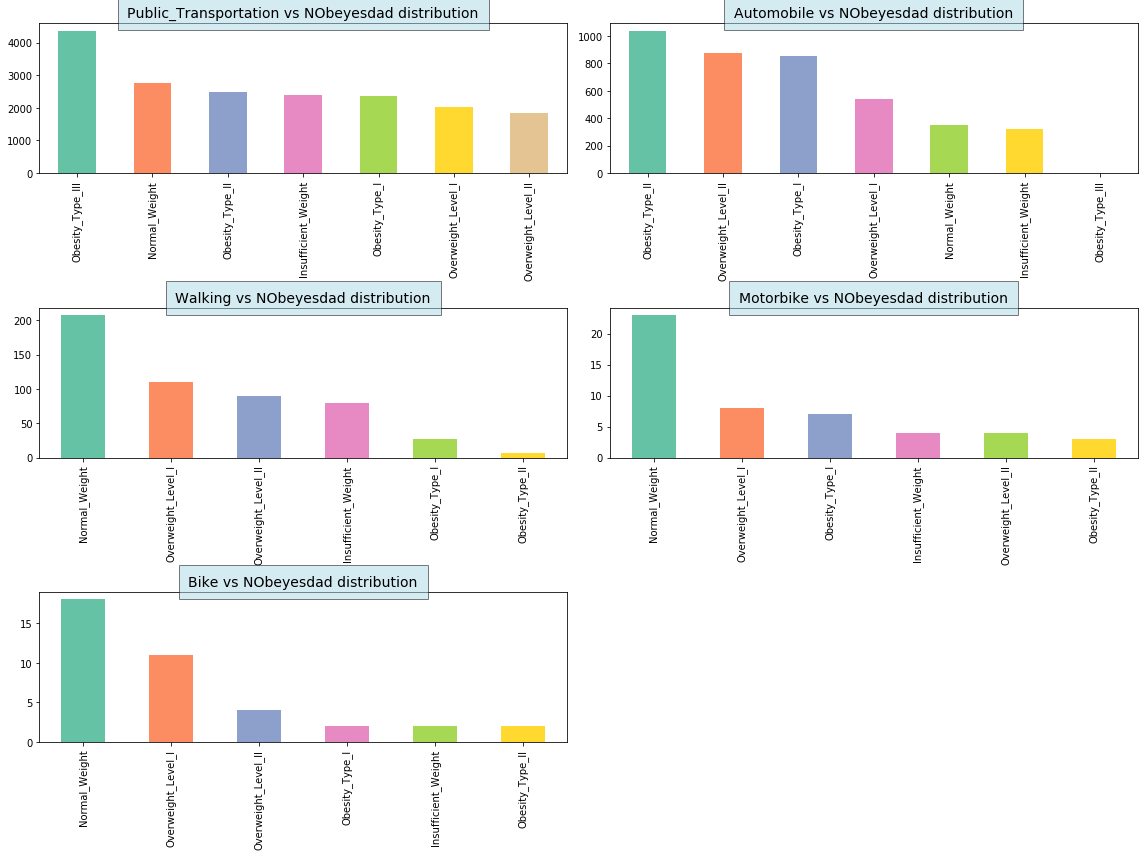

In [ ]:

public_trans = train[train.MTRANS == 'Public_Transportation'].NObeyesdad.value_counts()
automobile_trans = train[train.MTRANS == 'Automobile'].NObeyesdad.value_counts()
walking_trans = train[train.MTRANS == 'Walking'].NObeyesdad.value_counts()
motorbike_trans = train[train.MTRANS == 'Motorbike'].NObeyesdad.value_counts()
bike_trans = train[train.MTRANS == 'Bike'].NObeyesdad.value_counts()


fig, axs = plt.subplots(3, 2, figsize=(16, 12))
axs = axs.flatten()

features = [public_trans, automobile_trans, walking_trans, motorbike_trans, bike_trans]
feature_values = ['Public_Transportation', 'Automobile', 'Walking', 'Motorbike', 'Bike']

for i, feature in enumerate(features):
    feature.plot(kind='bar', color=sns.color_palette('Set2'), ax=axs[i])
    axs[i].set_title(f'{feature_values[i]} vs NObeyesdad distribution', fontsize=14,
                     bbox={'facecolor': 'lightblue', 'alpha': 0.5, 'pad': 10})

axs[-1].axis('off')
plt.tight_layout()
plt.show()


- Individuals who use public transportation as their primary mode of commuting exhibit a slightly higher prevalence of obesity compared to those who use other modes of transportation.


- Among individuals who use automobiles as their primary mode of transportation, there is a relatively even distribution of weight classifications, with a slightly higher proportion of individuals with normal weight.


- Walking as the primary mode of transportation appears to be associated with a lower prevalence of obesity compared to other modes of transportation.


- Motorbike and bike users show a similar distribution of weight classifications, with a relatively higher proportion of individuals with normal weight and a lower proportion of individuals with obesity.


- Overall, the analysis of the bar graphs suggests that the mode of transportation may have some association with weight classification, with public transportation users having a higher likelihood of obesity and walking users having a lower likelihood of obesity.

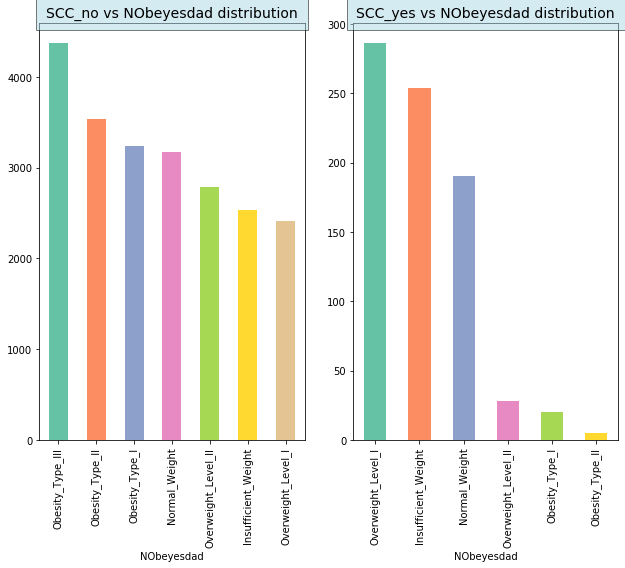

In [ ]:
SCC_no = train[train.SCC == 'no']['NObeyesdad'].value_counts()
SCC_yes = train[train.SCC == 'yes']['NObeyesdad'].value_counts()
feature_values = ['SCC_no', 'SCC_yes']


fig, axs = plt.subplots(1, 2, figsize=(9, 8))
axs = axs.flatten()

for i, feature in enumerate([SCC_no, SCC_yes]):
    feature.plot(kind='bar', color=sns.color_palette('Set2'), ax=axs[i])
    axs[i].set_title(f'{feature_values[i]} vs NObeyesdad distribution', fontsize=14,
                     bbox={'facecolor': 'lightblue', 'alpha': 0.5, 'pad': 10})
    axs[i].set_xlabel('NObeyesdad')

plt.tight_layout()
plt.show()

- Individuals without SCC are more likely to be obese compared to those with SCC.

- This suggests that there may be an association between adherence to self-care and weight classification, with individuals with SCC having a lower risk of obesity.

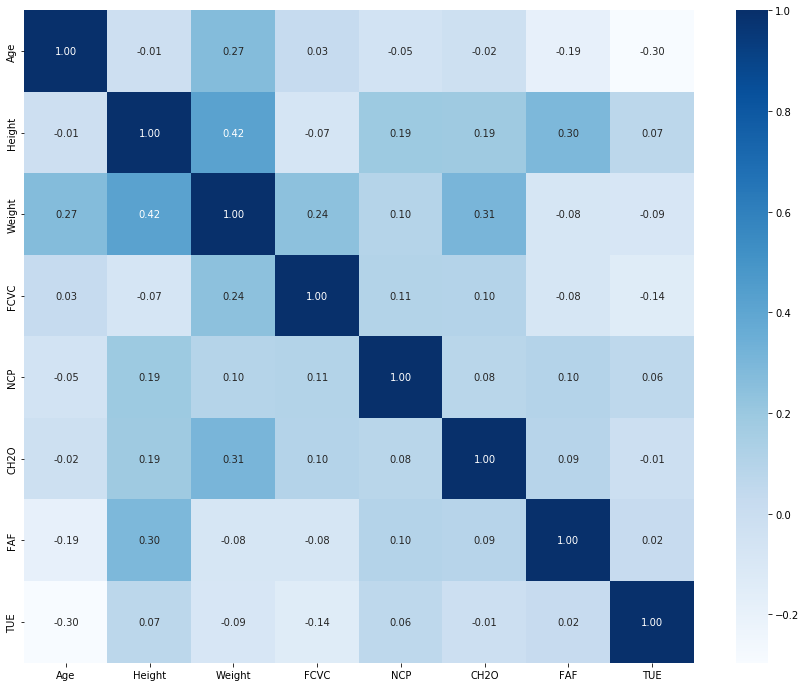

In [ ]:
df_corr=train.select_dtypes(include=["float64","int64"]).corr()
plt.figure(figsize=(15,12))
sns.heatmap(df_corr,annot=True,cmap="Blues",fmt=".2f");

- there are no correlation between features

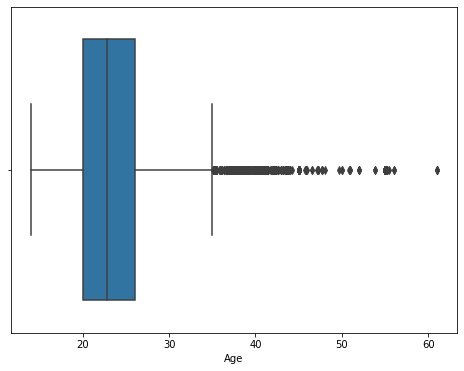

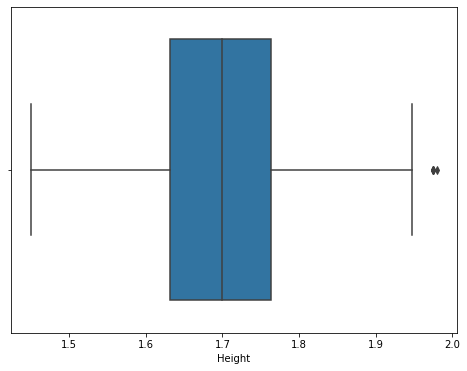

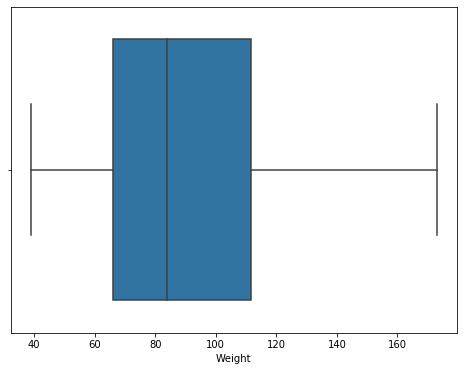

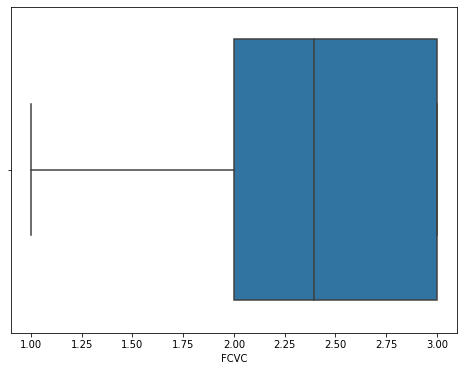

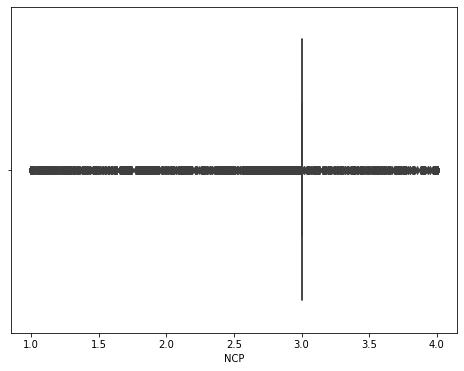

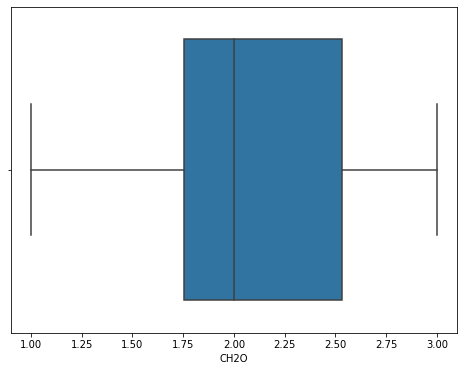

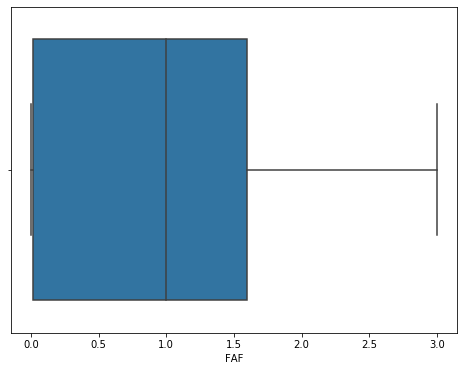

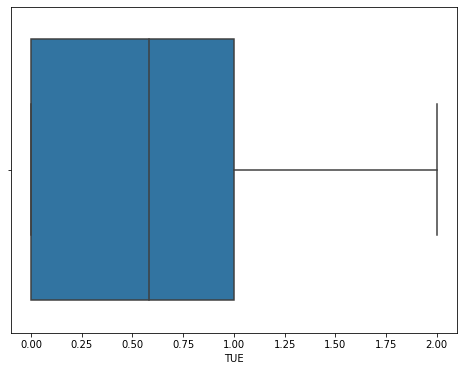

In [ ]:
for col in train.columns:
    if train[col].dtype in ['int64', 'float64']:
        plt.figure(figsize=(8, 6))
        sns.boxplot(data=train, x=col)
        plt.xlabel(col)
        plt.show()

- there are outliers in some features like Age & NCP

In [ ]:
train.skew()

Age       1.584105
Height    0.012340
Weight    0.106606
FCVC     -0.364981
NCP      -1.517723
CH2O     -0.202765
FAF       0.504868
TUE       0.664557
dtype: float64

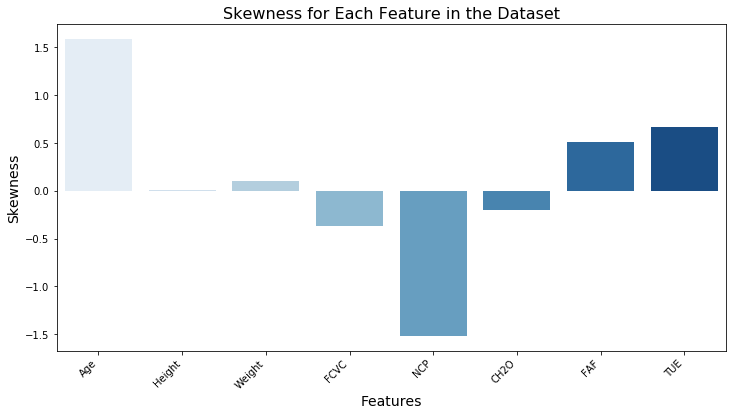

In [ ]:
skew_values = train.skew()

plt.figure(figsize=(12, 6))
sns.barplot(x=skew_values.index, y=skew_values.values, palette='Blues')
plt.title('Skewness for Each Feature in the Dataset', fontsize=16)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Skewness', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.show()

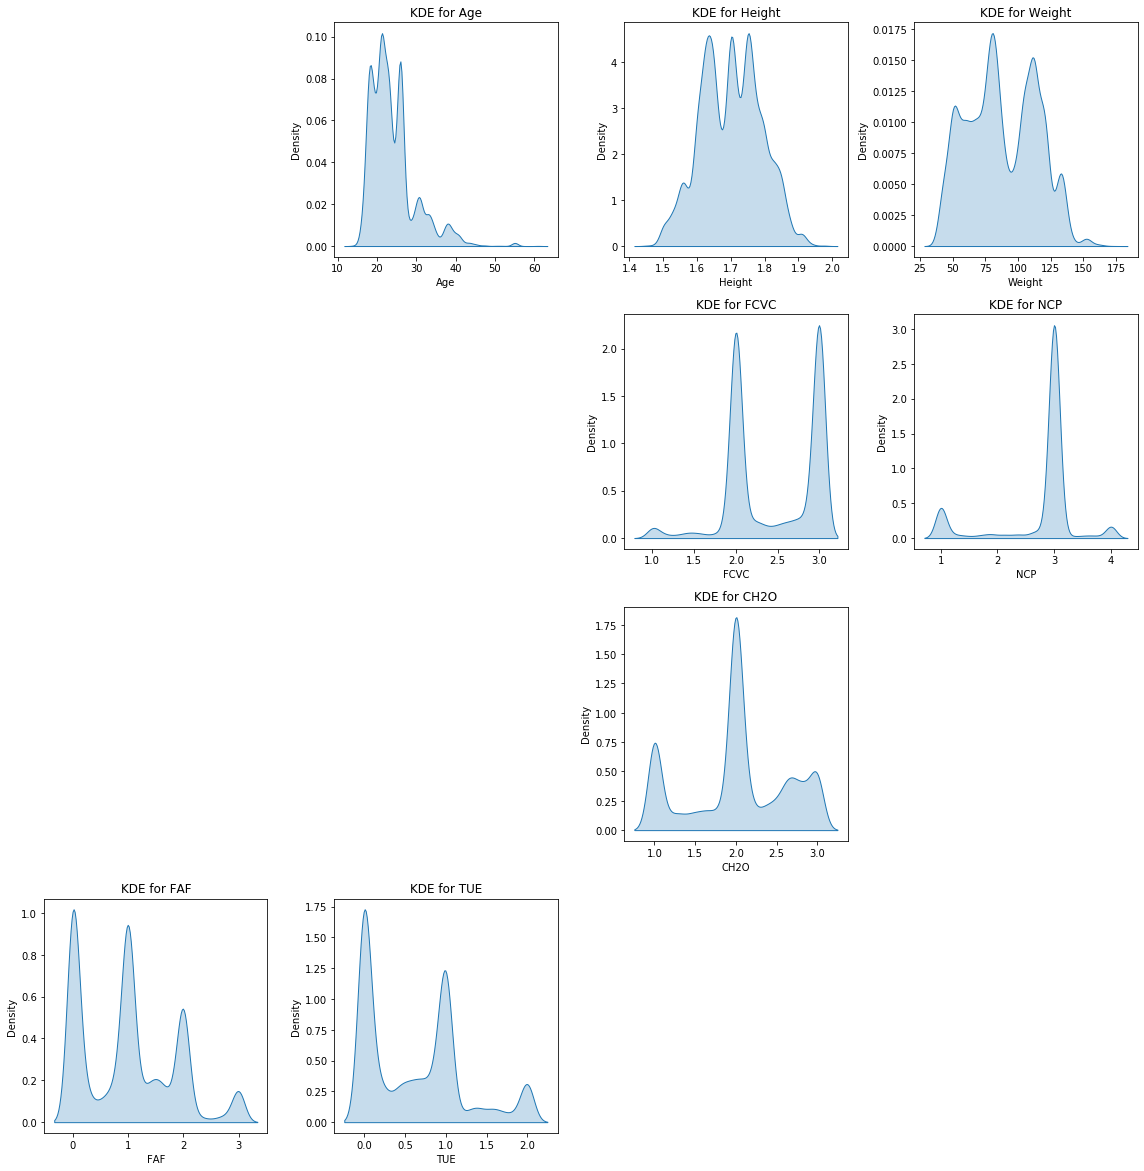

In [ ]:
num_columns = len(train.columns)
num_rows = (num_columns + 3) // 4
plt.figure(figsize=(16, num_rows * 4))

for i, column in enumerate(train.columns, 1):
    if pd.api.types.is_numeric_dtype(train[column].dtype):
        plt.subplot(num_rows, 4, i)
        sns.kdeplot(train[column], fill=True, palette='Blues')
        plt.title(f'KDE for {column}')
        plt.xlabel(column)
        plt.ylabel('Density')

plt.tight_layout()
plt.show()

- There is right skew in feature "Age"= 1.58625
- there is left skew in feature "NCP"= -1.56225

In [ ]:
cat_col = list(train.select_dtypes(include=['object']).columns)
if 'NObeyesdad' in cat_col:
    cat_col.remove('NObeyesdad')

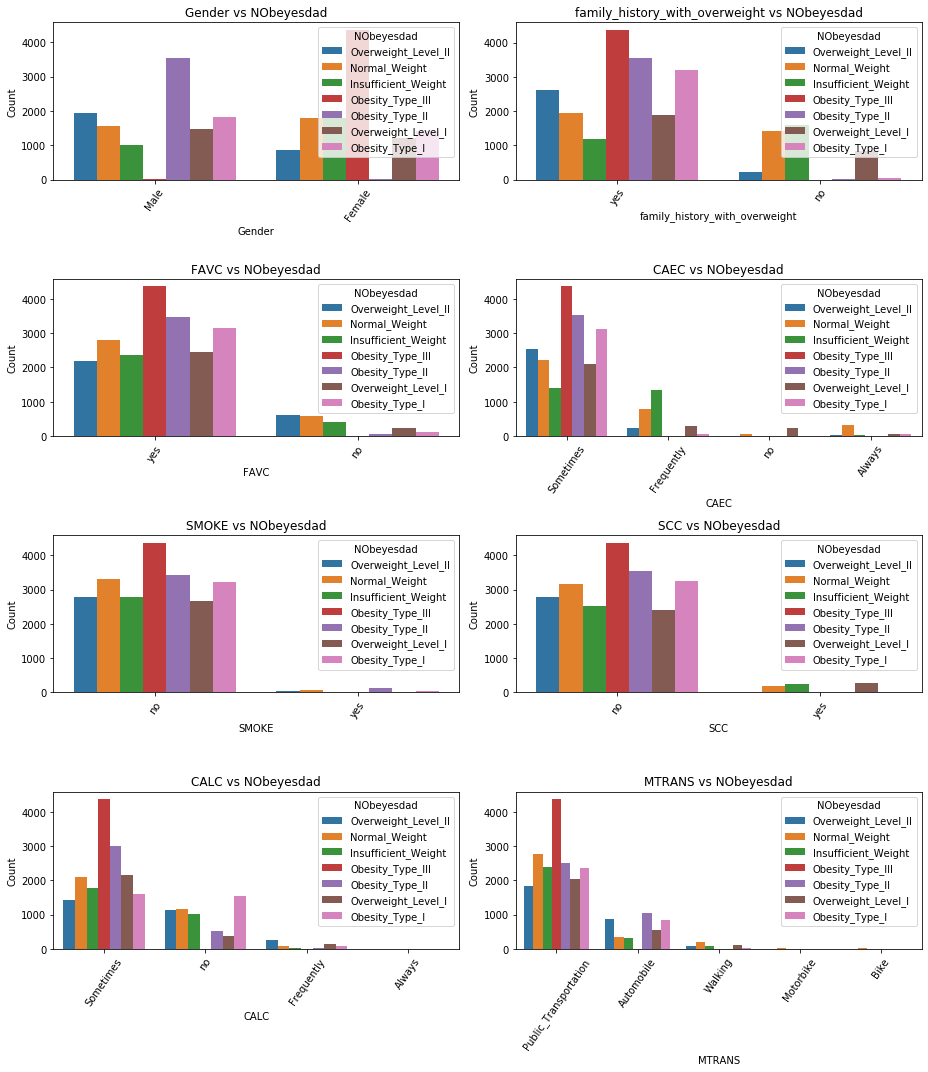

In [ ]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(13, 15))
axes = axes.flatten()
for i ,col in enumerate(cat_col):
    sns.countplot(x=col,hue='NObeyesdad',data=train,ax=axes[i])
    axes[i].set_title(f'{col} vs NObeyesdad')
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=55)

plt.tight_layout()
plt.show()

- In general, women are more prone to obesity compared to men.
- If a person has a family history of overweight, their likelihood of experiencing obesity is higher.
- People who consume large quantities of high-calorie foods (FCVC) are more likely to experience obesity.
- People who consume snacks between meals(CAEC) sometimes are more likely to experience obesity.
- People who do not smoke are more likely to develop obesity compared to those who smoke.
- People who occasionally consume alcoholic beverages or drink sometimes are more likely to develop obesity.

# **4) Data Preparation**

In [44]:
ordinal_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
categorical_columns = train.select_dtypes(include='object').columns
if 'NObeyesdad' in categorical_columns:
    categorical_columns = categorical_columns.drop(['NObeyesdad'])
train[categorical_columns] = ordinal_encoder.fit_transform(train[categorical_columns])

In [45]:
train[categorical_columns] = train[categorical_columns].astype(int)

In [46]:
lb=LabelEncoder()
train['NObeyesdad']=lb.fit_transform(train['NObeyesdad'])

In [47]:
train['NCP'] = train['NCP'].astype(int)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22845 entries, 0 to 22868
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          22845 non-null  int64  
 1   Age                             22845 non-null  float64
 2   Height                          22845 non-null  float64
 3   Weight                          22845 non-null  float64
 4   family_history_with_overweight  22845 non-null  int64  
 5   FAVC                            22845 non-null  int64  
 6   FCVC                            22845 non-null  float64
 7   NCP                             22845 non-null  int64  
 8   CAEC                            22845 non-null  int64  
 9   SMOKE                           22845 non-null  int64  
 10  CH2O                            22845 non-null  float64
 11  SCC                             22845 non-null  int64  
 12  FAF                             

In [48]:
scaler1=StandardScaler()

In [49]:
age_data = np.array(train['Age']).reshape(-1, 1)

In [50]:
train['Age'] = scaler1.fit_transform(age_data)

In [51]:
scaler2=StandardScaler()

In [52]:
weight_data = np.array(train['Weight']).reshape(-1, 1)

In [53]:
train['Weight']=scaler2.fit_transform(weight_data)

In [ ]:
train.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,1,0.096347,1.699998,-0.232290,1,1,2.000000,2,2,0,2.763573,0,0.000000,0.976473,2,3,6
1,0,-1.023162,1.560000,-1.168077,1,1,2.000000,3,1,0,2.000000,0,1.000000,1.000000,3,0,1
2,0,-1.023162,1.711460,-1.427315,1,1,1.880534,1,2,0,1.910378,0,0.866045,1.673584,3,3,0
3,0,-0.510107,1.710730,1.649336,1,1,3.000000,3,2,0,1.674061,0,1.467863,0.780199,2,3,4
4,1,1.347052,1.914186,0.227756,1,1,2.679664,1,2,0,1.979848,0,1.967973,0.931721,2,3,6


###### Prepare Test Set

In [54]:
test[categorical_columns] = ordinal_encoder.transform(test[categorical_columns])

In [55]:
test[categorical_columns] = test[categorical_columns].astype(int)

In [56]:
age_test = np.array(test['Age']).reshape(-1, 1)

In [57]:
test['Age']=scaler1.transform(age_test)

In [58]:
weight_test = np.array(test['Weight']).reshape(-1, 1)

In [59]:
test['Weight']=scaler2.transform(weight_test)

In [60]:
test['NCP'] = test['NCP'].astype(int)

In [ ]:
test.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,20758,1,0.523243,1.848294,1.246090,1,1,2.938616,3,2,0,2.825629,0,0.855400,0.000000,2,3
1,20759,0,-0.501895,1.600000,-0.826686,1,1,2.000000,1,2,0,3.000000,0,1.000000,0.000000,2,3
2,20760,0,0.366883,1.643355,0.903045,1,1,3.000000,3,2,0,2.621877,0,0.000000,0.250502,2,3
3,20761,1,-0.505500,1.553127,0.602188,1,1,2.000000,2,2,0,2.786417,0,0.094851,0.000000,2,3
4,20762,0,0.366883,1.627396,0.646426,1,1,3.000000,3,2,0,2.653531,0,0.000000,0.741069,2,3


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13840 entries, 0 to 13839
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              13840 non-null  int64  
 1   Gender                          13840 non-null  int64  
 2   Age                             13840 non-null  float64
 3   Height                          13840 non-null  float64
 4   Weight                          13840 non-null  float64
 5   family_history_with_overweight  13840 non-null  int64  
 6   FAVC                            13840 non-null  int64  
 7   FCVC                            13840 non-null  float64
 8   NCP                             13840 non-null  int64  
 9   CAEC                            13840 non-null  int64  
 10  SMOKE                           13840 non-null  int64  
 11  CH2O                            13840 non-null  float64
 12  SCC                             

##### Split Train Set

In [61]:
X=train.drop(['NObeyesdad'],axis=1)
y=train['NObeyesdad']

# **GradientBoostingClassifier Model**

 **i) Baseline Model Training**

In [ ]:
model=GradientBoostingClassifier()

In [ ]:
model.fit(X,y)

GradientBoostingClassifier()

In [ ]:
y_cv_pred = cross_val_predict(model, X, y, cv=5,method='predict')

In [ ]:
print(classification_report(y,y_cv_pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      2790
           1       0.88      0.88      0.88      3364
           2       0.90      0.89      0.89      3261
           3       0.96      0.97      0.97      3545
           4       1.00      1.00      1.00      4370
           5       0.81      0.78      0.80      2703
           6       0.81      0.83      0.82      2812

    accuracy                           0.91     22845
   macro avg       0.90      0.90      0.90     22845
weighted avg       0.91      0.91      0.91     22845



Text(0.5, 1.0, 'Confusion Matrix')

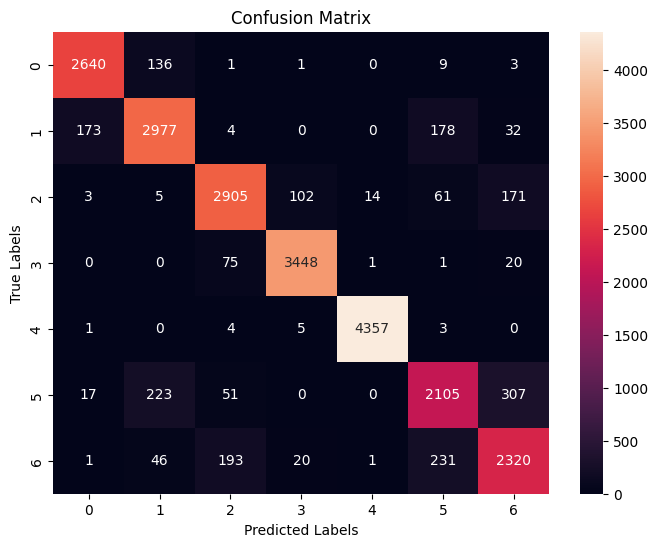

In [ ]:
conf_matrix = confusion_matrix(y, y_cv_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

Extra Trees Classifier

              precision    recall  f1-score   support

           0       0.93      0.92      0.92      2790
           1       0.82      0.87      0.84      3364
           2       0.88      0.87      0.87      3261
           3       0.96      0.97      0.96      3545
           4       1.00      1.00      1.00      4370
           5       0.77      0.70      0.73      2703
           6       0.77      0.79      0.78      2812

    accuracy                           0.88     22845
   macro avg       0.87      0.87      0.87     22845
weighted avg       0.88      0.88      0.88     22845



Text(0.5, 1.0, 'Confusion Matrix')

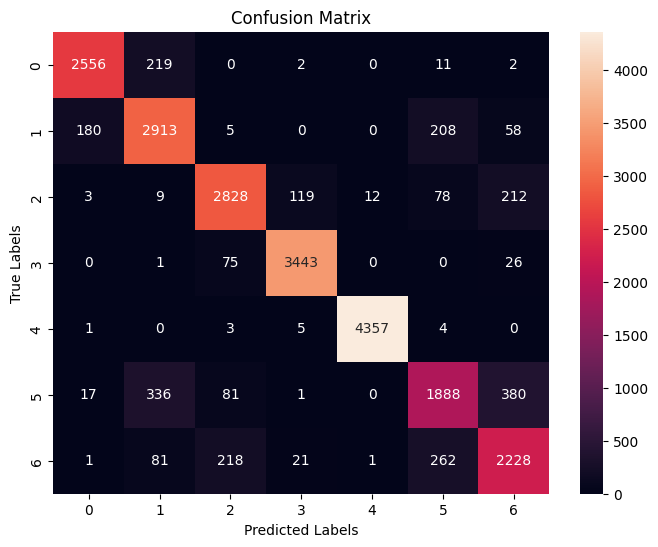

In [ ]:
model2 = ExtraTreesClassifier()
model2.fit(X,y)
y_cv_pred2 = cross_val_predict(model2, X, y, cv=5,method='predict')
print(classification_report(y,y_cv_pred2))
conf_matrix = confusion_matrix(y, y_cv_pred2)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

In [62]:
testx=test.drop('id',axis=1)

In [ ]:
predict=model.predict(testx)

In [ ]:
submission=pd.DataFrame({"id":test['id'],"NObeyesdad":predict})

In [ ]:
submission['NObeyesdad']=lb.inverse_transform(predict)

In [ ]:
submission.to_csv("submission.csv",index=False)

In [ ]:
submission

,id,NObeyesdad
0,20758,Obesity_Type_II
1,20759,Overweight_Level_I
2,20760,Obesity_Type_III
3,20761,Obesity_Type_I
4,20762,Obesity_Type_III
...,...,...
13835,34593,Overweight_Level_II
13836,34594,Overweight_Level_I
13837,34595,Insufficient_Weight
13838,34596,Normal_Weight


# **LGBMClassifier**

In [63]:
lbm_clf = lgbm.LGBMClassifier(objective='multiclass', metric='multi_error', boosting_type='gbdt', random_state=42, num_class=7, feature_pre_filter=False, lambda_l1=0.0, lambda_l2=0.0, num_leaves=31, feature_fraction=0.5, bagging_fraction=1.0, bagging_freq=0, min_child_samples=20, num_iterations=1000, n_jobs=-1)

In [64]:
lbm_clf.fit(X,y)

[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] lambda_l2 is set=0.0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0
[LightGBM] [Warning] lambda_l1 is set=0.0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] lambda_l2 is set=0.0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0
[LightGBM] [Warning] lambda_l1 is set=0.0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0
[Ligh

LGBMClassifier(bagging_fraction=1.0, bagging_freq=0, feature_fraction=0.5,
               feature_pre_filter=False, lambda_l1=0.0, lambda_l2=0.0,
               metric='multi_error', n_jobs=-1, num_class=7,
               num_iterations=1000, objective='multiclass', random_state=42)

In [65]:
y_cv_pred = cross_val_predict(lbm_clf, X, y, cv=5,method='predict')

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      2790
           1       0.87      0.88      0.88      3364
           2       0.90      0.89      0.89      3261
           3       0.97      0.97      0.97      3545
           4       1.00      1.00      1.00      4370
           5       0.80      0.78      0.79      2703
           6       0.81      0.82      0.82      2812

    accuracy                           0.91     22845
   macro avg       0.90      0.90      0.90     22845
weighted avg       0.91      0.91      0.91     22845



Text(0.5, 1.0, 'Confusion Matrix')

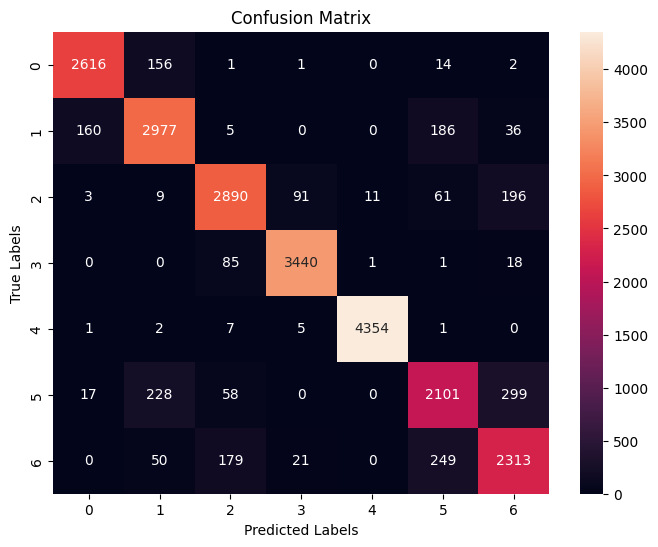

In [66]:
print(classification_report(y,y_cv_pred))
conf_matrix = confusion_matrix(y, y_cv_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

In [67]:
predict=lbm_clf.predict(testx)
submission_lbm=pd.DataFrame({"id":test['id'],"NObeyesdad":predict})
submission_lbm['NObeyesdad']=lb.inverse_transform(predict)
submission_lbm.to_csv("submission_lbm.csv",index=False)

[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] lambda_l2 is set=0.0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0
[LightGBM] [Warning] lambda_l1 is set=0.0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0


# **SVC Model**

In [75]:
model_svc=SVC(C=100, kernel='rbf',random_state=42)

              precision    recall  f1-score   support

           0       0.90      0.93      0.92      2790
           1       0.85      0.83      0.84      3364
           2       0.87      0.87      0.87      3261
           3       0.96      0.97      0.96      3545
           4       1.00      1.00      1.00      4370
           5       0.75      0.72      0.73      2703
           6       0.76      0.77      0.77      2812

    accuracy                           0.88     22845
   macro avg       0.87      0.87      0.87     22845
weighted avg       0.88      0.88      0.88     22845



Text(0.5, 1.0, 'Confusion Matrix')

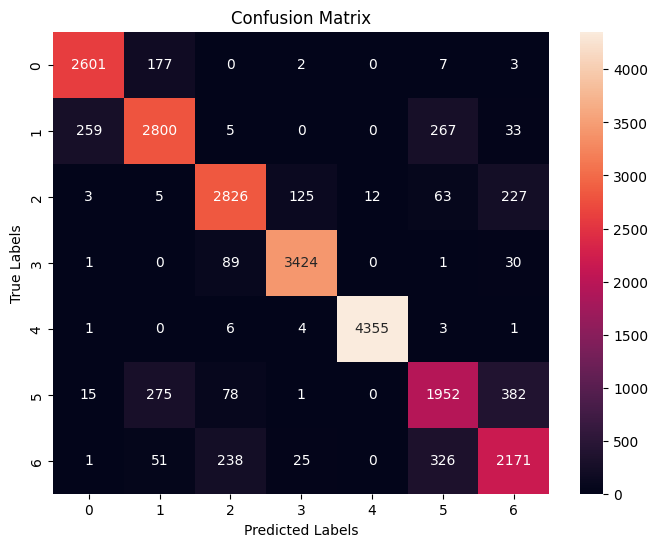

In [77]:
model_svc.fit(X,y)
y_cv_pred3 = cross_val_predict(model_svc, X, y, cv=5,method='predict')
print(classification_report(y,y_cv_pred3))
conf_matrix = confusion_matrix(y, y_cv_pred3)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')